# Problem Statement

A non-banking financial institution (NBFI) or non-bank financial company (NBFC) is a Financial Institution that does not have a full banking license or is not supervised by a national or international banking regulatory agency. NBFC facilitates bank-related financial services, such as investment, risk pooling, contractual savings, and market brokering.

An NBFI is struggling to mark profits due to an increase in defaults in the vehicle loan category. The company aims to determine the client’s loan repayment abilities and understand the relative importance of each parameter contributing to a borrower’s ability to repay the loan.

**Goal**:
The goal of the problem is to predict whether a client will default on the vehicle loan payment or not. For each ID in the Test_Dataset, you must predict the “Default” level.

**Datasets**
The problem contains two datasets, Train_Dataset and Test_Dataset. Model building is to be done on Train_Dataset and the Model testing is to be done on Test_Dataset.

**Metric to measure**
The metric to measure is the F1_Score. F1_Score is the harmonic mean of Recall and Precision.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Lets import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#SMOTE to balance the Imbalance Data
from imblearn.over_sampling import SMOTE

#for Spliting Data and Hyperparameter Tuning
from sklearn.model_selection import train_test_split

In [4]:
#Lets read datasets
train = pd.read_csv("/content/drive/MyDrive/Cdac/Project/DataSet/Train_Dataset.csv")
test = pd.read_csv("/content/drive/MyDrive/Cdac/Project/DataSet/Test_Dataset.csv")
# /content/drive/MyDrive/Cdac/Project/DataSet/Train_Dataset.csv

<ipython-input-4-0834471cbed9>:2: DtypeWarning: Columns (1,7,8,16,17,18,19,20,35) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv("/content/drive/MyDrive/Cdac/Project/DataSet/Train_Dataset.csv")
<ipython-input-4-0834471cbed9>:3: DtypeWarning: Columns (7,8,16,17,18,19,20,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  test = pd.read_csv("/content/drive/MyDrive/Cdac/Project/DataSet/Test_Dataset.csv")


### DATA PREPERATION & DATA UNDERSTANDING

In [5]:
train.reset_index(drop = True, inplace = True)
test.reset_index(drop = True, inplace = True)

train['temp_col'] = 'train'
test['temp_col']='test'

df = pd.concat([train,test], axis =0)

# df.head()

In [6]:
# df.Car_Owned.value_counts()

In [7]:
# Data types info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202756 entries, 0 to 80899
Data columns (total 41 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          202756 non-null  int64  
 1   Client_Income               196715 non-null  object 
 2   Car_Owned                   196770 non-null  float64
 3   Bike_Owned                  196646 non-null  float64
 4   Active_Loan                 196667 non-null  float64
 5   House_Own                   196748 non-null  float64
 6   Child_Count                 196790 non-null  float64
 7   Credit_Amount               196837 non-null  object 
 8   Loan_Annuity                194741 non-null  object 
 9   Accompany_Client            199802 non-null  object 
 10  Client_Income_Type          196554 non-null  object 
 11  Client_Education            196761 non-null  object 
 12  Client_Marital_Status       196840 non-null  object 
 13  Client_Gender  

************************************************************
**1. MISSING DATA TREATMENT**

In [8]:
# df.isnull().sum()
round(100*(df.isnull().sum()/len(df.index)), 2)

ID                             0.00
Client_Income                  2.98
Car_Owned                      2.95
Bike_Owned                     3.01
Active_Loan                    3.00
House_Own                      2.96
Child_Count                    2.94
Credit_Amount                  2.92
Loan_Annuity                   3.95
Accompany_Client               1.46
Client_Income_Type             3.06
Client_Education               2.96
Client_Marital_Status          2.92
Client_Gender                  1.99
Loan_Contract_Type             2.95
Client_Housing_Type            3.01
Population_Region_Relative     4.01
Age_Days                       3.00
Employed_Days                  2.99
Registration_Days              2.97
ID_Days                        4.86
Own_House_Age                 65.93
Mobile_Tag                     0.00
Homephone_Tag                  0.00
Workphone_Working              0.00
Client_Occupation             34.17
Client_Family_Members          2.00
Cleint_City_Rating          

In [9]:
# df.Type_Organization.value_counts()

In [10]:
#Lets remove variables with more than ~25% of missing values
df =  df.drop(['Own_House_Age','Client_Occupation','Score_Source_1','Social_Circle_Default','Score_Source_3','Type_Organization'],1)

<ipython-input-10-847a097c6747>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df =  df.drop(['Own_House_Age','Client_Occupation','Score_Source_1','Social_Circle_Default','Score_Source_3','Type_Organization'],1)


In [11]:
#Mising value analyis and treatment for continuous variables

df.select_dtypes(include=['float64','int64']).isnull().sum()

ID                              0
Car_Owned                    5986
Bike_Owned                   6110
Active_Loan                  6089
House_Own                    6008
Child_Count                  5966
Mobile_Tag                      0
Homephone_Tag                   0
Workphone_Working               0
Client_Family_Members        4054
Cleint_City_Rating           4040
Application_Process_Day      3967
Application_Process_Hour     6069
Phone_Change                 6087
Credit_Bureau               30822
Default                     80900
dtype: int64

In [12]:
#lets Replace Ys and Ns to 1s and 0s

# df.loc[df.Car_Owned == 'N', 'Car_Owned'] = 0
# df.loc[df.Car_Owned == 'Y', 'Car_Owned'] = 1

df.Car_Owned.fillna(df.Car_Owned.mode()[0], inplace=True)
df.Car_Owned.unique()



array([0., 1.])

In [13]:
# df['Bike_Owned'] = df['Bike_Owned'].map({'N':0,'Y':1})
# df['Active_Loan'] = df['Active_Loan'].map({'N':0,'Y':1})
# df['House_Own'] = df['House_Own'].map({'N':0, 'Y':1})


df['Bike_Owned'].fillna(df.Bike_Owned.mode()[0],inplace=True)
df['Active_Loan'].fillna(df.Active_Loan.mode()[0],inplace=True)
df['House_Own'].fillna(df.House_Own.mode()[0],inplace=True)

In [ ]:
#Lets treat continuos variables and impute median as missing values.

# income_mean = np.mean(df.Client_Income[(df.Client_Income != '$') & (df.Client_Income != '#')].astype(float))
income_median = (df.Client_Income[(df.Client_Income != '$') & (df.Client_Income != '#')].astype(float)).median()

df.loc[df['Client_Income'] == '$', 'Client_Income'] = income_median
df.loc[df['Client_Income'] == '#', 'Client_Income'] = income_median
df['Client_Income'].fillna(df['Client_Income'].median(),inplace=True)

df.Client_Income = df.Client_Income.astype(float)
df.Client_Income.isnull().sum()

0

In [ ]:
#Child_Count
df.Child_Count.fillna(df.Child_Count.median(),inplace=True)


#Credit Amount
cr_amt_median = (df.Credit_Amount[(df.Credit_Amount != '$')].astype(float)).median()

df.loc[df.Credit_Amount == '$', 'Credit_Amount'] =cr_amt_median
df.Credit_Amount.fillna(df.Credit_Amount.median(),inplace=True)
df.Credit_Amount = df.Credit_Amount.astype(float)


#Loan Annuity
la_median = (df.Loan_Annuity[(df.Loan_Annuity !='$') & (df.Loan_Annuity != '#VALUE!')].astype(float)).median()
df.loc[df.Loan_Annuity == '$','Loan_Annuity'] = la_median
df.loc[df.Loan_Annuity == '#VALUE!', 'Loan_Annuity'] = la_median

df.Loan_Annuity.fillna(df.Loan_Annuity.median(),inplace=True)
df.Loan_Annuity = df.Loan_Annuity.astype(float)

#Population Region Rel.
##pop_mean = np.mean(df.Population_Region_Relative[(df.Population_Region_Relative != '@') & (df.Population_Region_Relative != '#')].astype(float))
pop_median = (df.Population_Region_Relative[(df.Population_Region_Relative != '@') & (df.Population_Region_Relative != '#')].astype(float)).median()

df.loc[df['Population_Region_Relative'] == '@', 'Population_Region_Relative'] = pop_median
df.loc[df['Population_Region_Relative'] == '#', 'Population_Region_Relative'] = pop_median
df['Population_Region_Relative'].fillna(df['Population_Region_Relative'].median(),inplace=True)

df.Population_Region_Relative = df.Population_Region_Relative.astype(float)


# Age Days
agedays_median = (df.Age_Days[(df.Age_Days != 'x')].astype(float)).median()

df.loc[df['Age_Days'] == 'x', 'Age_Days'] = agedays_median
df['Age_Days'].fillna(df['Age_Days'].median(),inplace=True)

df.Age_Days = df.Age_Days.astype(float)


#Employed Days
empdays_median = (df.Employed_Days[(df.Employed_Days != 'x')].astype(float)).median()

df.loc[df['Employed_Days'] == 'x', 'Employed_Days'] = empdays_median
df['Employed_Days'].fillna(df['Employed_Days'].median(),inplace=True)

df.Employed_Days = df.Employed_Days.astype(float)


#Registration Days
regdays_median = (df.Registration_Days[(df.Registration_Days != 'x')].astype(float)).median()

df.loc[df['Registration_Days'] == 'x', 'Registration_Days'] = regdays_median
df['Registration_Days'].fillna(df['Registration_Days'].median(),inplace=True)

df.Registration_Days = df.Registration_Days.astype(float)


#ID Days
iddays_median = (df.ID_Days[(df.ID_Days != 'x')].astype(float)).median()

df.loc[df['ID_Days'] == 'x', 'ID_Days'] = iddays_median
df['ID_Days'].fillna(df['ID_Days'].median(),inplace=True)

df.ID_Days = df.ID_Days.astype(float)


#source score
score_median = (df.Score_Source_2[(df.Score_Source_2 != '#')].astype(float)).median()

df.loc[df['Score_Source_2'] == '#', 'Score_Source_2'] = iddays_median
df['Score_Source_2'].fillna(df['Score_Source_2'].median(),inplace=True)

df.Score_Source_2 = df.Score_Source_2.astype(float)


#Other Vars

df.Client_Family_Members.fillna(df.Client_Family_Members.median(),inplace=True)
df.Cleint_City_Rating.fillna(df.Cleint_City_Rating.median(),inplace=True)
df.Application_Process_Hour.fillna(df.Application_Process_Hour.median(),inplace=True)
df.Phone_Change.fillna(df.Phone_Change.median(),inplace=True)
df.Credit_Bureau.fillna(df.Credit_Bureau.median(),inplace=True)
df.Application_Process_Day.fillna(df.Application_Process_Day.median(),inplace=True)


In [ ]:
# df.Car_Owned.value_counts()

In [ ]:
# regex = "[^0-9]+"
# series = df["Loan_Annuity"]
# df1 = series.str.contains(regex)

# df1['Loan_Annuity']=df['Loan_Annuity'].str.extract(r'([^0-9]+)')
# df1.Loan_Annuity.unique()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202756 entries, 0 to 80899
Data columns (total 35 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          202756 non-null  int64  
 1   Client_Income               202756 non-null  float64
 2   Car_Owned                   202756 non-null  float64
 3   Bike_Owned                  202756 non-null  float64
 4   Active_Loan                 202756 non-null  float64
 5   House_Own                   202756 non-null  float64
 6   Child_Count                 202756 non-null  float64
 7   Credit_Amount               202756 non-null  float64
 8   Loan_Annuity                202756 non-null  float64
 9   Accompany_Client            199802 non-null  object 
 10  Client_Income_Type          196554 non-null  object 
 11  Client_Education            196761 non-null  object 
 12  Client_Marital_Status       196840 non-null  object 
 13  Client_Gender  

In [ ]:
df.select_dtypes(include=['float64','int64']).isnull().sum()

ID                                0
Client_Income                     0
Car_Owned                         0
Bike_Owned                        0
Active_Loan                       0
House_Own                         0
Child_Count                       0
Credit_Amount                     0
Loan_Annuity                      0
Population_Region_Relative        0
Age_Days                          0
Employed_Days                     0
Registration_Days                 0
ID_Days                           0
Mobile_Tag                        0
Homephone_Tag                     0
Workphone_Working                 0
Client_Family_Members             0
Cleint_City_Rating                0
Application_Process_Day           0
Application_Process_Hour          0
Score_Source_2                    0
Phone_Change                      0
Credit_Bureau                     0
Default                       80900
dtype: int64

**********************************************************************
**2.OUTLIER TREATMENT FOR CONTINOUS VARIABLES**

In [ ]:
df.select_dtypes(include=['float64','int64']).iloc[:,:13].describe(percentiles=[.01,.05,.1,.25,.5,.75,.82,.83,.85,.9,.95,.99])

# df.select_dtypes(include=['float64','int64']).iloc[:,13:].describe(percentiles=[.01,.05,.1,.25,.5,.75,.82,.83,.85,.9,.95,.99])

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Population_Region_Relative,Age_Days,Employed_Days,Registration_Days
count,2.027560e+05,2.027560e+05,202756.000000,202756.000000,202756.000000,202756.000000,202756.000000,202756.000000,202756.000000,202756.000000,202756.000000,202756.000000,202756.000000
mean,1.219266e+07,1.679182e+04,0.330806,0.322249,0.483665,0.701646,0.405724,59752.351931,2706.952544,0.023267,16028.912205,65550.829435,4966.159591
std,4.977689e+04,1.164936e+04,0.470505,0.467339,0.499734,0.457537,0.720372,39708.490199,1425.017820,0.496669,4300.239455,137614.101204,3466.000763
min,1.210000e+07,2.565000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,4500.000000,198.000000,0.000533,7673.000000,0.000000,0.000000
1%,1.210203e+07,4.500000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,7650.000000,630.900000,0.002134,8284.550000,117.000000,53.000000
5%,1.211014e+07,6.750000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,13950.000000,900.000000,0.005002,9457.000000,232.000000,344.000000
10%,1.212028e+07,8.100000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,18000.000000,1125.000000,0.006671,10327.000000,402.000000,716.000000
25%,1.215069e+07,1.125000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,27450.000000,1687.500000,0.010032,12528.750000,964.000000,2104.000000
50%,1.220069e+07,1.440000e+04,0.000000,0.000000,0.000000,1.000000,0.000000,51477.750000,2493.900000,0.018850,15740.000000,2219.000000,4493.000000
75%,1.223021e+07,2.025000e+04,1.000000,1.000000,1.000000,1.000000,1.000000,80865.000000,3404.250000,0.026392,19573.000000,5403.000000,7352.000000


In [ ]:
df.Phone_Change.describe(percentiles=[.01,.05,.1,.15,.17,.2,.25,.5,.75,.82,.83,.85,.9,.95,.99])

count    202756.000000
mean        955.463172
std         816.175889
min           0.000000
1%            0.000000
5%            0.000000
10%           0.000000
15%           7.000000
17%          65.000000
20%         174.000000
25%         286.000000
50%         755.000000
75%        1549.000000
82%        1762.000000
83%        1798.000000
85%        1871.000000
90%        2142.000000
95%        2512.000000
99%        3136.000000
max        4292.000000
Name: Phone_Change, dtype: float64

In [ ]:
df.loc[df.Client_Income > 46800, 'Client_Income'] = 46800
df.loc[df.Child_Count > 3,'Child_Count'] = 3
df.loc[df.Credit_Amount > 182448, 'Credit_Amount'] = 182448
df.loc[df.Loan_Annuity > 6975.45, 'Loan_Annuity'] = 6975.45
df.loc[df.Population_Region_Relative >= 0.072508, 'Population_Region_Relative'] = 0.072508
df.loc[df.Registration_Days > 13817.000000, 'Registration_Days'] = 13817.000000
df.loc[df.Client_Family_Members > 5, 'Client_Family_Members'] = 5
df.loc[df.Score_Source_2 > 0.7823405, 'Score_Source_2'] = 0.7823405
# df.loc[df.Phone_Change < 10, 'Phone_Change'] = 10
df.loc[df.Credit_Bureau > 8, 'Credit_Bureau'] = 8
df.loc[df.ID_Days > 5429,'ID_Days'] = 5429
df.loc[df.Application_Process_Hour > 19,'Application_Process_Hour'] = 19
df.loc[df.Employed_Days > 11842.1, 'Employed_Days'] = 11842.1
df.loc[df.Registration_Days > 13844.0, 'Registration_Days'] = 13844.0



df.select_dtypes(include=['float64','int64']).iloc[:,13:].describe(percentiles=[.01,.05,.1,.25,.5,.75,.82,.83,.85,.9,.95,.99])

,ID_Days,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Score_Source_2,Phone_Change,Credit_Bureau,Default
count,202756.000000,202756.000000,202756.000000,202756.00000,202756.000000,202756.000000,202756.000000,202756.000000,2.027560e+05,202756.000000,202756.000000,121856.000000
mean,3003.350268,0.999995,0.200221,0.28049,2.148129,2.029311,3.155823,12.055550,5.161533e-01,955.463172,1.752205,0.080792
std,1469.891778,0.002221,0.400167,0.44924,0.891746,0.498370,1.740195,3.201091,1.869345e-01,816.175889,1.720398,0.272517
min,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,0.000000,0.000000,8.170000e-08,0.000000,0.000000,0.000000
1%,66.550000,1.000000,0.000000,0.00000,1.000000,1.000000,0.000000,4.000000,3.176975e-02,0.000000,0.000000,0.000000
5%,390.000000,1.000000,0.000000,0.00000,1.000000,1.000000,0.000000,7.000000,1.383969e-01,0.000000,0.000000,0.000000
10%,757.000000,1.000000,0.000000,0.00000,1.000000,1.000000,1.000000,8.000000,2.238476e-01,0.000000,0.000000,0.000000
25%,1797.000000,1.000000,0.000000,0.00000,2.000000,2.000000,2.000000,10.000000,4.029593e-01,286.000000,1.000000,0.000000
50%,3256.000000,1.000000,0.000000,0.00000,2.000000,2.000000,3.000000,12.000000,5.651609e-01,755.000000,1.000000,0.000000
75%,4267.000000,1.000000,0.000000,1.00000,3.000000,2.000000,5.000000,14.000000,6.595351e-01,1549.000000,3.000000,0.000000


*****************************************
**3.MISSING DATA TREATMENT FOR CATEGORICAL VARIABLES**

In [ ]:
df.select_dtypes(include=['object']).isnull().sum()

Accompany_Client              2954
Client_Income_Type            6202
Client_Education              5995
Client_Marital_Status         5916
Client_Gender                 4040
Loan_Contract_Type            5972
Client_Housing_Type           6095
Client_Permanent_Match_Tag       0
Client_Contact_Work_Tag          0
temp_col                         0
dtype: int64

In [ ]:
print(df.Client_Permanent_Match_Tag.value_counts())
print(df.Client_Contact_Work_Tag.value_counts())

Yes    187051
No      15705
Name: Client_Permanent_Match_Tag, dtype: int64
Yes    166318
No      36438
Name: Client_Contact_Work_Tag, dtype: int64


In [ ]:
# train.Employed_Days.value_counts()

df.loc[train.Accompany_Client == '##', 'Accompany_Client'] = 'Unaccompanied'
df.Accompany_Client.fillna(train.Accompany_Client.mode()[0],inplace=True)

# train.Type_Organization.value_counts()

df.Client_Income_Type.fillna(df.Client_Income_Type.mode()[0],inplace=True)
df.Client_Education.fillna(df.Client_Education.mode()[0],inplace=True)
df.Client_Housing_Type.fillna(df.Client_Housing_Type.mode()[0],inplace=True)
df.Client_Gender.fillna(df.Client_Gender.mode()[0],inplace=True)
df.Client_Marital_Status.fillna(df.Client_Marital_Status.mode()[0],inplace=True)
df.Loan_Contract_Type.fillna(df.Loan_Contract_Type.mode()[0],inplace=True)


#Converting Yes's and NOs to 1s and 0s
df['Client_Permanent_Match_Tag'] = df['Client_Permanent_Match_Tag'].map({'No':0,'Yes':1})
df['Client_Contact_Work_Tag'] = df['Client_Contact_Work_Tag'].map({'No':0,'Yes':1})


In [ ]:
df.select_dtypes(include=['object']).isnull().sum()

Accompany_Client         0
Client_Income_Type       0
Client_Education         0
Client_Marital_Status    0
Client_Gender            0
Loan_Contract_Type       0
Client_Housing_Type      0
temp_col                 0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202756 entries, 0 to 80899
Data columns (total 35 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          202756 non-null  int64  
 1   Client_Income               202756 non-null  float64
 2   Car_Owned                   202756 non-null  float64
 3   Bike_Owned                  202756 non-null  float64
 4   Active_Loan                 202756 non-null  float64
 5   House_Own                   202756 non-null  float64
 6   Child_Count                 202756 non-null  float64
 7   Credit_Amount               202756 non-null  float64
 8   Loan_Annuity                202756 non-null  float64
 9   Accompany_Client            202756 non-null  object 
 10  Client_Income_Type          202756 non-null  object 
 11  Client_Education            202756 non-null  object 
 12  Client_Marital_Status       202756 non-null  object 
 13  Client_Gender  

### Dummy variable creation

In [ ]:
# xd = pd.get_dummies(df,drop_first=True)

In [ ]:
# Creating a dummy variable for the variable 'Contract' and dropping the first one.
acc_clint = pd.get_dummies(df['Accompany_Client'],prefix='Accompany_Client',drop_first=True)
#Adding the results to the master dataframe
df = pd.concat([df,acc_clint],axis=1)

Inc_type = pd.get_dummies(df['Client_Income_Type'],prefix='Client_Income_Type',drop_first=True)
#Adding the results to the master dataframe
df = pd.concat([df,Inc_type],axis=1)

# org = pd.get_dummies(train['Type_Organization'],prefix='Type_Organization',drop_first=True)
# #Adding the results to the master dataframe
# train = pd.concat([train,org],axis=1)

edu = pd.get_dummies(df['Client_Education'],prefix='Client_Education',drop_first=True)
#Adding the results to the master dataframe
df = pd.concat([df,edu],axis=1)

mar = pd.get_dummies(df['Client_Marital_Status'],prefix='Client_Marital_Status',drop_first=True)
#Adding the results to the master dataframe
df = pd.concat([df,mar],axis=1)

gender = pd.get_dummies(df['Client_Gender'],prefix='Client_Gender',drop_first=True)
#Adding the results to the master dataframe
df = pd.concat([df,gender],axis=1)

cont = pd.get_dummies(df['Loan_Contract_Type'],prefix='Loan_Contract_Type',drop_first=True)
#Adding the results to the master dataframe
df = pd.concat([df,cont],axis=1)

house = pd.get_dummies(df['Client_Housing_Type'],prefix='Client_Housing_Type',drop_first=True)
#Adding the results to the master dataframe
df = pd.concat([df,house],axis=1)





In [ ]:
df = df.drop(['Accompany_Client', 'Client_Income_Type', 'Client_Education',
       'Client_Marital_Status', 'Client_Gender', 'Loan_Contract_Type',
       'Client_Housing_Type'],1)

<ipython-input-42-29be9fde7460>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(['Accompany_Client', 'Client_Income_Type', 'Client_Education',


### Feature Standardization

In [ ]:
# df.iloc[:,30:].describe()

In [ ]:
df1 = df[['Client_Income','Child_Count','Credit_Amount','Loan_Annuity','Age_Days','Employed_Days','Registration_Days','ID_Days',
          'Client_Family_Members','Cleint_City_Rating','Application_Process_Day','Application_Process_Hour','Phone_Change','Credit_Bureau']]

In [ ]:
normalized_df=(df1-df1.mean())/df1.std()

In [ ]:
df = df.drop(['Client_Income','Child_Count','Credit_Amount','Loan_Annuity','Age_Days','Employed_Days','Registration_Days','ID_Days',
              'Client_Family_Members','Cleint_City_Rating','Application_Process_Day','Application_Process_Hour','Phone_Change','Credit_Bureau'],1)

<ipython-input-46-ea0f19225555>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(['Client_Income','Child_Count','Credit_Amount','Loan_Annuity','Age_Days','Employed_Days','Registration_Days','ID_Days',


In [ ]:
df = pd.concat([df,normalized_df],axis=1)

In [ ]:
df.isnull().sum()

ID                                         0
Car_Owned                                  0
Bike_Owned                                 0
Active_Loan                                0
House_Own                                  0
Population_Region_Relative                 0
Mobile_Tag                                 0
Homephone_Tag                              0
Workphone_Working                          0
Client_Permanent_Match_Tag                 0
Client_Contact_Work_Tag                    0
Score_Source_2                             0
Default                                80900
temp_col                                   0
Accompany_Client_Alone                     0
Accompany_Client_Group                     0
Accompany_Client_Kids                      0
Accompany_Client_Others                    0
Accompany_Client_Partner                   0
Accompany_Client_Relative                  0
Accompany_Client_Unaccompanied             0
Client_Income_Type_Commercial              0
Client_Inc

In [ ]:
# Now that we have cleand the data, lets spit back the data into Train and Test. (Data was already split, I had combind to clean and repare the data)

X = df[df['temp_col']=='train']
y=X['Default']
X=X.drop(['ID','temp_col','Default'],axis=1)

test_df =df[df['temp_col']=='test']
test_df =test_df.drop(['temp_col','Default'],1)
print(X.shape,test_df.shape)

(121856, 56) (80900, 57)


<ipython-input-49-1849510a2a86>:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  test_df =test_df.drop(['temp_col','Default'],1)


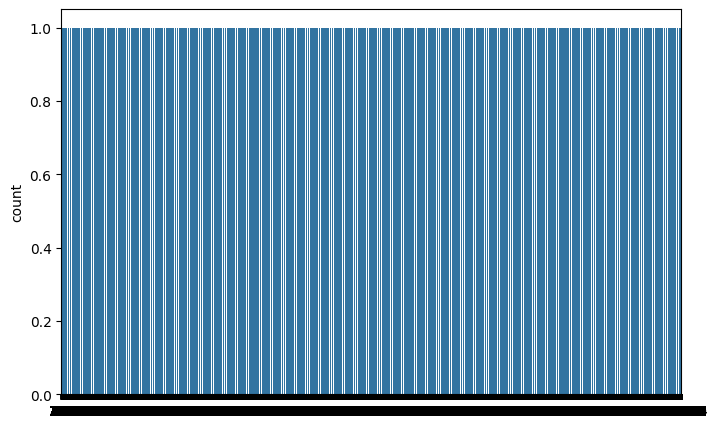

In [ ]:
#lETS CALCULATE THE DEFAULT RATE

fig,ax=plt.subplots(figsize=(8,5))
sns.countplot(pd.Series(y),ax=ax)
plt.show()

In [ ]:
print(round(((sum(y)/len(y))*100),2),'%')

8.08 %


**We have just over 8% of Loan Defaulters**

### Balancing the dataset using the SMOTE

C:\Users\mirza.mohammedhashim\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


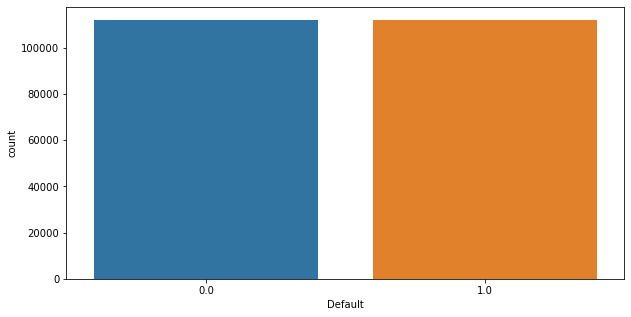

In [ ]:
#Importing the imblearn
# import imblearn
# from imblearn.over_sampling import SMOTE #Importing SMOTE

x_resam,y_resam = SMOTE(k_neighbors=5).fit_resample(X,y) #resample fit

#Count plot
fig,ax=plt.subplots(figsize=(10,5))
sns.countplot(pd.Series(y_resam),ax=ax)
plt.show()

### Model Building

<Axes: ylabel='count'>

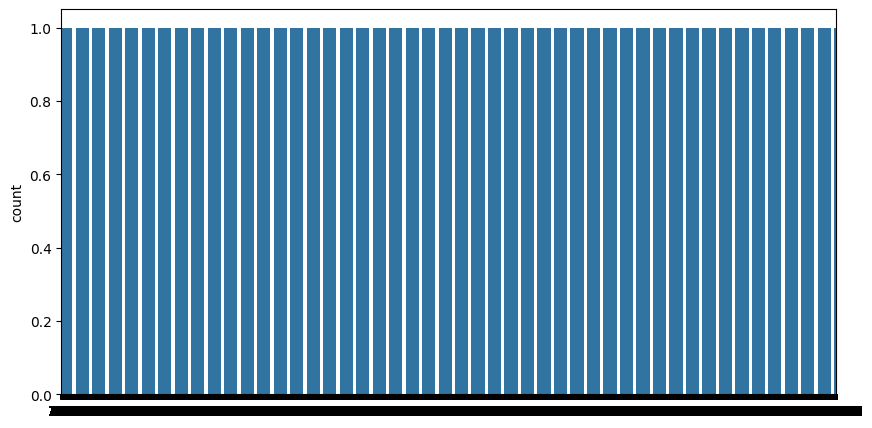

In [ ]:
fig,ax=plt.subplots(figsize=(10,5))
sns.countplot(pd.Series(y_resam),ax=ax)

In [ ]:
# Importing the imblearn
# import imblearn
# from imblearn.over_sampling import SMOTE #Importing SMOTE

x_resam,y_resam = SMOTE(k_neighbors=5).fit_resample(X,y)
#resample fit
fig,ax=plt.subplots(figsize=(10,5))
sns.countplot(pd.Series(y_resam),ax=ax)

In [ ]:
plt.show()

In [ ]:
import statsmodels.api as sm

# Logistic regression model
np.seterr(divide='ignore', invalid='ignore')

logm1 = sm.GLM(y_resam,(sm.add_constant(x_resam)), family = sm.families.Binomial())
logm1.fit().summary()


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                Default   No. Observations:               224022
Model:                            GLM   Df Residuals:                   223967
Model Family:                Binomial   Df Model:                           54
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 19 Feb 2024   Deviance:                   6.3150e+06
Time:                        12:11:45   Pearson chi2:                 3.09e+20
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                3.407e+15   6.71e+07   5.08e+07      0.000    3.41e+15    3.41e+15
Car_Owned                           -4.692e+14   3.48e+05  -1.35e+09      0.000   -4.69e+14   -4.69e+14
Bike_Owned                          -9.214e+13   3.21e+05  -2.87e+08      0.000   -9.21e+13   -9.21e+13
Active_Loan                          7.235e+11   2.97e+05   2.44e+06      0.000    7.23e+11    7.23e+11
House_Own                            2.186e+14   3.45e+05   6.34e+08      0.000    2.19e+14    2.19e+14
Population_Region_Relative           4.955e+15   1.36e+07   3.64e+08      0.000    4.95e+15    4.95e+15
Mobile_Tag                            5.15e+15   6.71e+07   7.67e+07      0.000    5.15e+15    5.15e+15
Homephone_Tag                       -4.126e+14   4.18e+05  -9.87e+08      0.000   -4.13e+14   -4.13e+14
Workphone_Working                   -5.355e+14   3.78e+05  -1.42e+09      0.000   -5.35e+14   -5.35e+14
Client_Permanent_Match_Tag          -2.798e+14   4.65e+05  -6.02e+08      0.000    -2.8e+14    -2.8e+14
Client_Contact_Work_Tag             -3.076e+14   3.53e+05  -8.71e+08      0.000   -3.08e+14   -3.08e+14
Score_Source_2                      -2.219e+15    8.3e+05  -2.67e+09      0.000   -2.22e+15   -2.22e+15
Accompany_Client_Alone              -2.269e+15   6.07e+05  -3.74e+09      0.000   -2.27e+15   -2.27e+15
Accompany_Client_Group              -3.234e+15   6.43e+06  -5.03e+08      0.000   -3.23e+15   -3.23e+15
Accompany_Client_Kids               -3.234e+15   1.88e+06  -1.72e+09      0.000   -3.23e+15   -3.23e+15
Accompany_Client_Others             -3.371e+15   2.15e+06  -1.57e+09      0.000   -3.37e+15   -3.37e+15
Accompany_Client_Partner            -3.194e+15   1.09e+06  -2.92e+09      0.000   -3.19e+15   -3.19e+15
Accompany_Client_Relative           -2.843e+15   7.46e+05  -3.81e+09      0.000   -2.84e+15   -2.84e+15
Accompany_Client_Unaccompanied      -3.446e+15   1.94e+07  -1.78e+08      0.000   -3.45e+15   -3.45e+15
Client_Income_Type_Commercial       -2.868e+15   6.38e+05  -4.49e+09      0.000   -2.87e+15   -2.87e+15
Client_Income_Type_Govt Job         -3.153e+15   8.83e+05  -3.57e+09      0.000   -3.15e+15   -3.15e+15
Client_Income_Type_Maternity leave  -5.888e+15   4.75e+07  -1.24e+08      0.000   -5.89e+15   -5.89e+15
Client_Income_Type_Retired           -2.25e+15   9.34e+05  -2.41e+09      0.000   -2.25e+15   -2.25e+15
Client_Income_Type_Service          -2.416e+15   5.74e+05  -4.21e+09      0.000   -2.42e+15   -2.42e+15
Client_Income_Type_Student          -7.725e+15   2.37e+07  -3.25e+08      0.000   -7.73e+15   -7.73e+15
Client_Income_Type_Unemployed       -3.055e+15   2.74e+07  -1.11e+08      0.000   -3.06e+15   -3.06e+15
Client_Education_Graduation dropout -8.814e+14   1.03e+06  -8.56e+0

In [ ]:
round(X.corr(),1)

,Car_Owned,Bike_Owned,Active_Loan,House_Own,Population_Region_Relative,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,...,Age_Days,Employed_Days,Registration_Days,ID_Days,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Phone_Change,Credit_Bureau
Car_Owned,1.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.1,...,-0.1,-0.1,-0.1,-0.0,0.1,-0.0,-0.0,0.0,0.0,-0.0
Bike_Owned,-0.0,1.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0
Active_Loan,-0.0,0.0,1.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,...,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0
House_Own,-0.0,0.0,-0.0,1.0,0.0,-0.0,-0.1,-0.0,0.1,0.0,...,0.1,0.1,0.0,-0.0,0.0,0.0,0.0,-0.1,-0.0,0.1
Population_Region_Relative,0.0,-0.0,0.0,0.0,1.0,0.0,-0.0,0.1,0.0,0.0,...,0.0,-0.0,0.0,0.0,-0.0,-0.5,-0.0,0.2,0.0,0.0
Mobile_Tag,-0.0,-0.0,0.0,-0.0,0.0,1.0,0.0,0.0,-0.0,-0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0
Homephone_Tag,0.0,-0.0,0.0,-0.1,-0.0,0.0,1.0,0.3,-0.0,-0.1,...,-0.2,-0.2,-0.1,-0.0,0.1,0.0,-0.0,0.0,0.0,-0.1
Workphone_Working,-0.0,-0.0,-0.0,-0.0,0.1,0.0,0.3,1.0,0.0,0.0,...,0.0,0.0,0.1,0.0,-0.0,-0.1,-0.0,0.1,0.1,-0.0
Client_Permanent_Match_Tag,-0.0,-0.0,0.0,0.1,0.0,-0.0,-0.0,0.0,1.0,0.0,...,0.2,0.1,0.1,0.1,-0.0,-0.0,0.0,-0.0,0.1,0.0
Client_Contact_Work_Tag,-0.1,-0.0,0.0,0.0,0.0,-0.0,-0.1,0.0,0.0,1.0,...,0.2,0.2,0.1,0.1,-0.1,-0.0,0.0,-0.0,0.0,0.0


In [ ]:
# X['Client_Education_junior secondary'].value_counts()

**NOTE: It's very difficult to analyze the correlations from the above table, lets visualise from the below heatmap chart**

<Axes: >

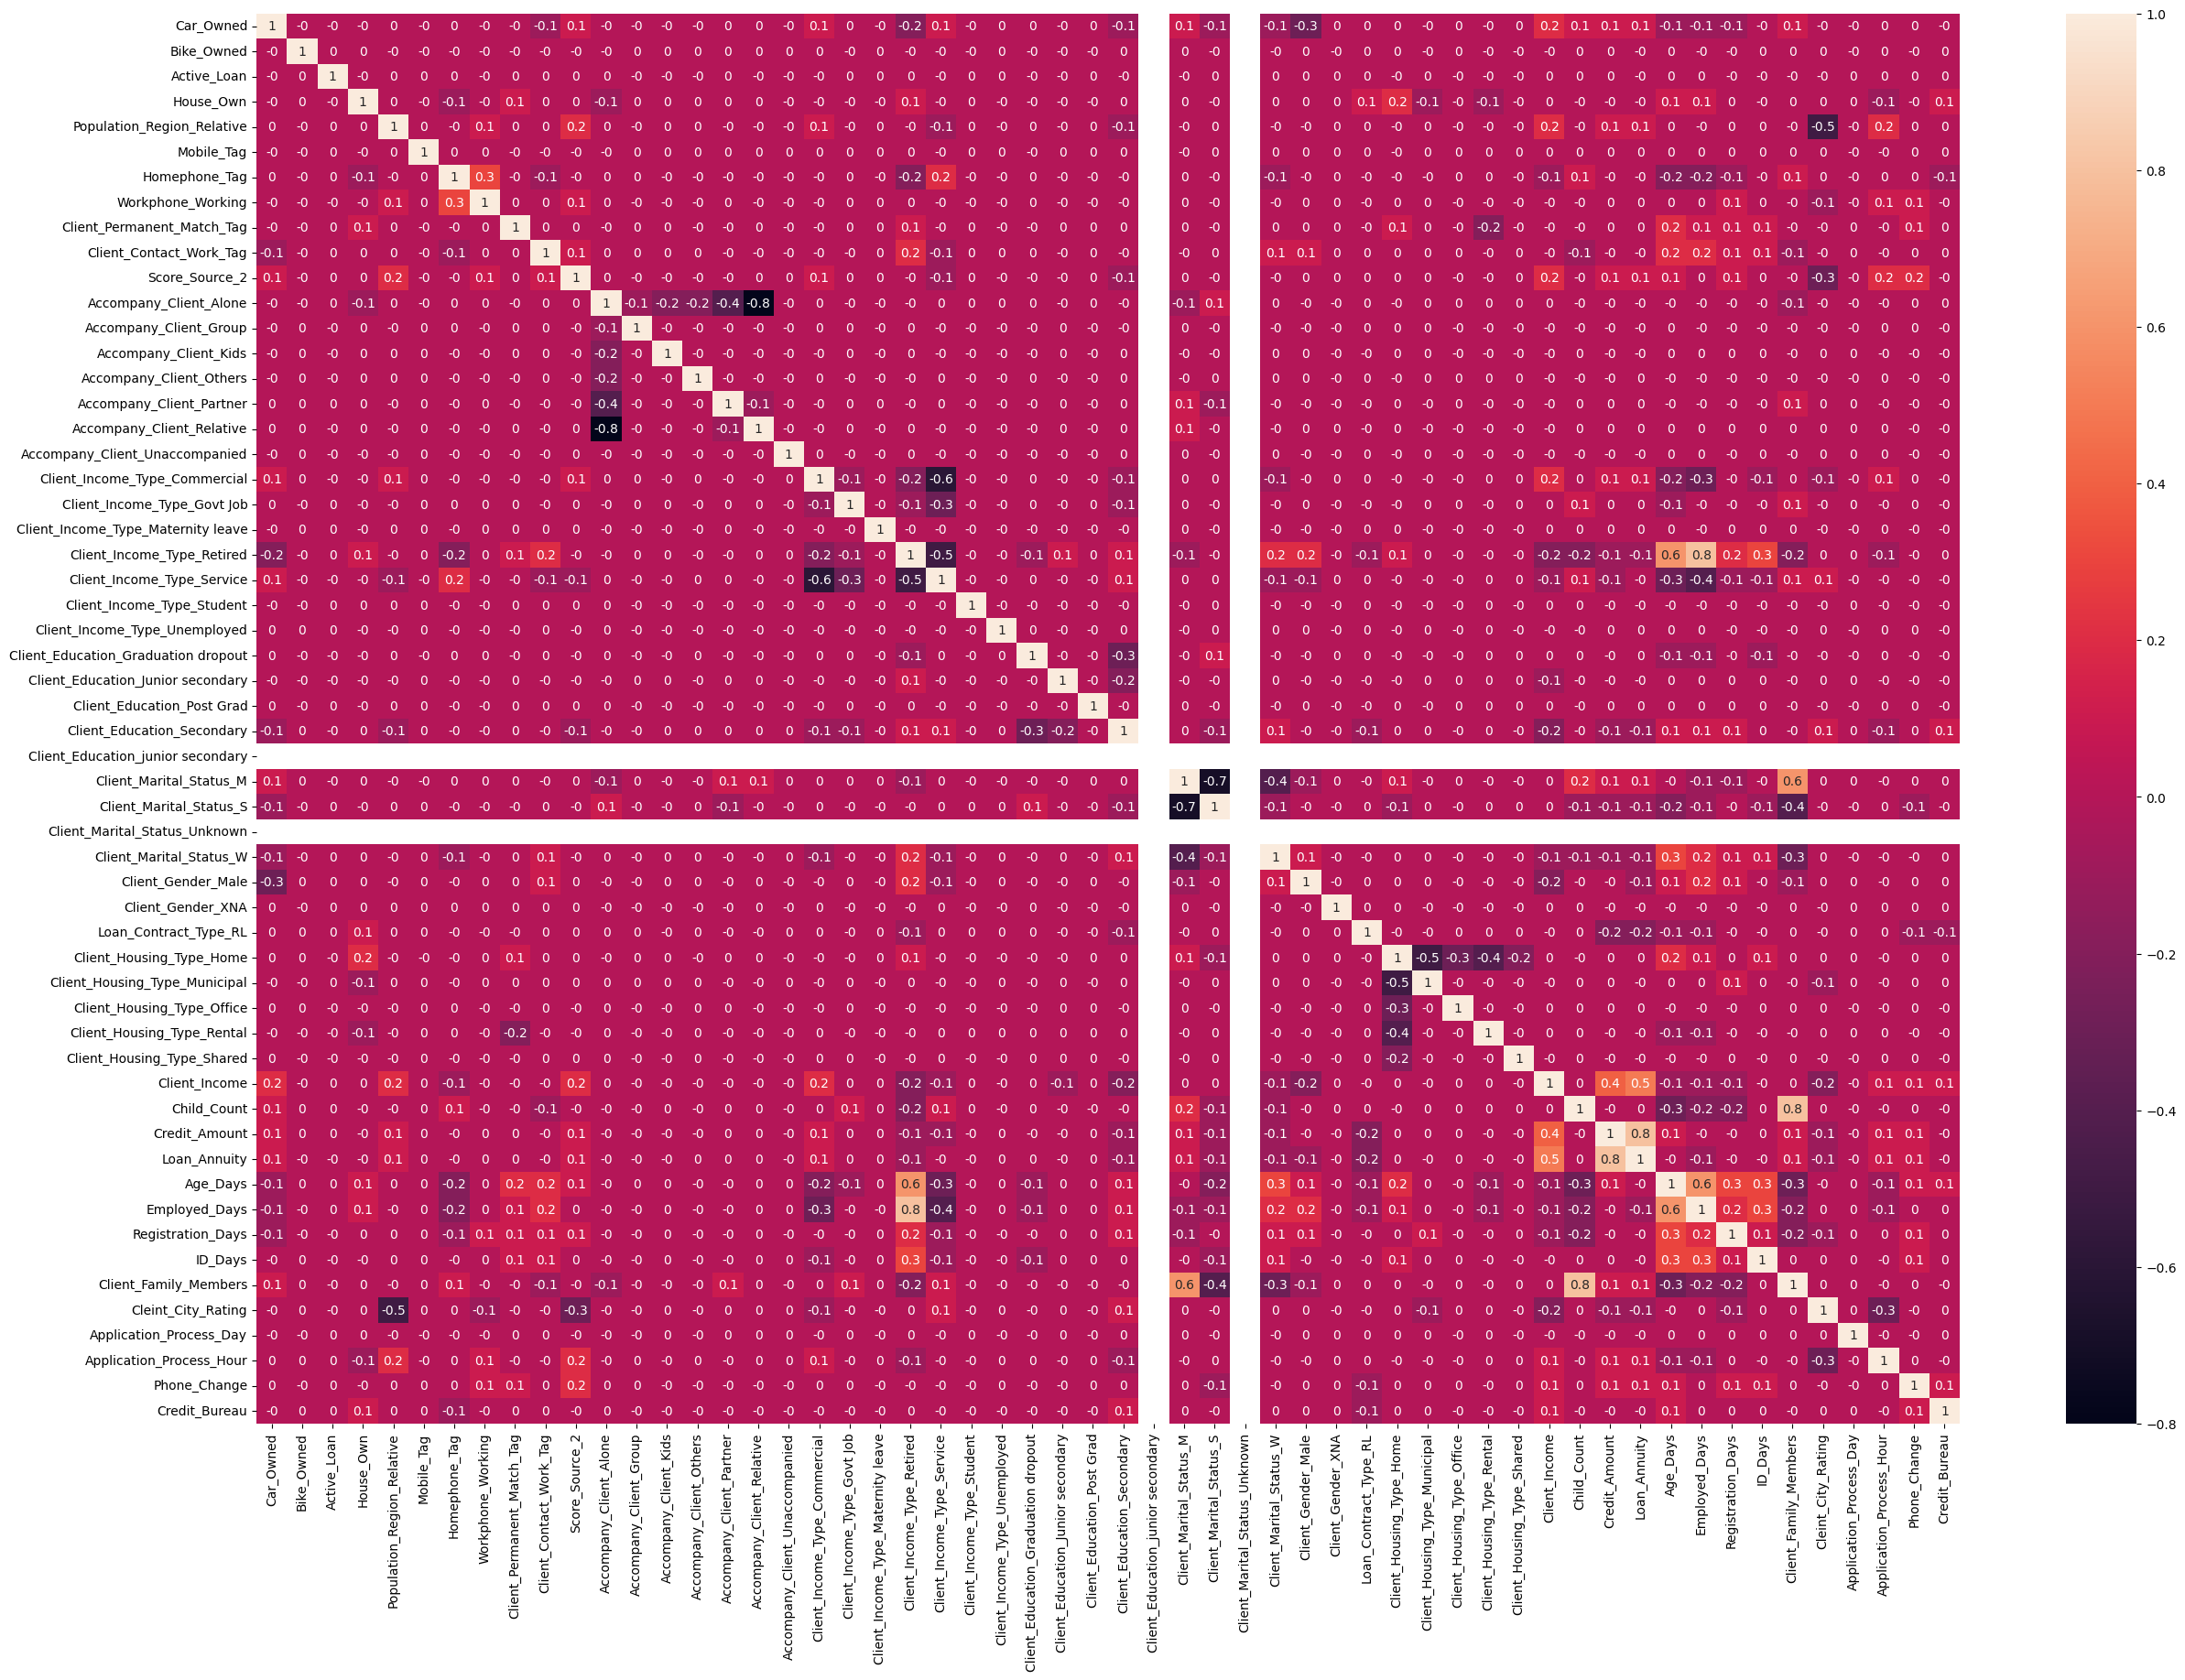

In [ ]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Let's see the correlation matrix
plt.figure(figsize = (30,20))        # Size of the figure
sns.heatmap(round(X.corr(),1),annot = True)

In [ ]:
# def correlation(dataset, threshold):
#     col_corr = set()
#     corr_matrix = dataset.corr()
#     for i in range(len(corr_matrix.columns)):
#         for j in range(i):
#             if (corr_matrix.iloc[i,j]) > threshold:
#                 colname = corr_matrix.columns[i]
#                 col_corr.add(colname)
#         return col_corr

In [ ]:
# corr_features = correlation(X,0.5)
# len(set(corr_features))

In [ ]:
x_resam = x_resam.drop(['Client_Education_junior secondary','Client_Marital_Status_Unknown'],1)
test_df = test_df.drop(['Client_Education_junior secondary','Client_Marital_Status_Unknown'],1)

<ipython-input-54-3e17f7baa66c>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_resam = x_resam.drop(['Client_Education_junior secondary','Client_Marital_Status_Unknown'],1)
<ipython-input-54-3e17f7baa66c>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  test_df = test_df.drop(['Client_Education_junior secondary','Client_Marital_Status_Unknown'],1)


### Feature Selection using RFE AND VIF

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter =100000)
from sklearn.feature_selection import RFE
rfe = RFE(estimator= logreg,n_features_to_select= 30)             # running RFE with 13 variables as output
rfe = rfe.fit(X,y)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)           # Printing the ranking

[ True False False  True  True False False  True  True False  True False
  True  True False  True False  True  True  True False  True  True  True
  True  True  True  True  True False False False False False  True  True
  True False  True  True  True  True False False False False  True  True
 False  True False False False False False False]
[ 1 20 19  1  1 14  2  1  1 23  1 18  1  1  7  1  6  1  1  1  9  1  1  1
  1  1  1  1  1 26 10 25 27 16  1  1  1 13  1  1  1  1 22 24  5  4  1  1
 12  1 15  3 17 21  8 11]


In [ ]:
for i in range(X.shape[1]):
    print("Column: %d, Selected %s, Rank %.3f" % (i,rfe.support_[i],rfe.ranking_[i]))

Column: 0, Selected True, Rank 1.000
Column: 1, Selected False, Rank 20.000
Column: 2, Selected False, Rank 19.000
Column: 3, Selected True, Rank 1.000
Column: 4, Selected True, Rank 1.000
Column: 5, Selected False, Rank 14.000
Column: 6, Selected False, Rank 2.000
Column: 7, Selected True, Rank 1.000
Column: 8, Selected True, Rank 1.000
Column: 9, Selected False, Rank 23.000
Column: 10, Selected True, Rank 1.000
Column: 11, Selected False, Rank 18.000
Column: 12, Selected True, Rank 1.000
Column: 13, Selected True, Rank 1.000
Column: 14, Selected False, Rank 7.000
Column: 15, Selected True, Rank 1.000
Column: 16, Selected False, Rank 6.000
Column: 17, Selected True, Rank 1.000
Column: 18, Selected True, Rank 1.000
Column: 19, Selected True, Rank 1.000
Column: 20, Selected False, Rank 9.000
Column: 21, Selected True, Rank 1.000
Column: 22, Selected True, Rank 1.000
Column: 23, Selected True, Rank 1.000
Column: 24, Selected True, Rank 1.000
Column: 25, Selected True, Rank 1.000
Column: 

In [ ]:
col = X.columns[rfe.support_]

x_resam2 = x_resam[col]
x_resam2.columns

Index(['Car_Owned', 'House_Own', 'Population_Region_Relative',
       'Workphone_Working', 'Client_Permanent_Match_Tag', 'Score_Source_2',
       'Accompany_Client_Group', 'Accompany_Client_Kids',
       'Accompany_Client_Partner', 'Accompany_Client_Unaccompanied',
       'Client_Income_Type_Commercial', 'Client_Income_Type_Govt Job',
       'Client_Income_Type_Retired', 'Client_Income_Type_Service',
       'Client_Income_Type_Student', 'Client_Income_Type_Unemployed',
       'Client_Education_Graduation dropout',
       'Client_Education_Junior secondary', 'Client_Education_Post Grad',
       'Client_Education_Secondary', 'Client_Gender_Male', 'Client_Gender_XNA',
       'Loan_Contract_Type_RL', 'Client_Housing_Type_Municipal',
       'Client_Housing_Type_Office', 'Client_Housing_Type_Rental',
       'Client_Housing_Type_Shared', 'Age_Days', 'Employed_Days', 'ID_Days'],
      dtype='object')

In [ ]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression(max_iter=10000)
logsk.fit(x_resam[col], y_resam)

LogisticRegression(max_iter=10000)

In [ ]:
#Comparing the model with StatsModels
logm4 = sm.GLM(y_resam,(sm.add_constant(x_resam[col])), family = sm.families.Binomial())
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                Default   No. Observations:               224022
Model:                            GLM   Df Residuals:                   223991
Model Family:                Binomial   Df Model:                           30
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.1852e+05
Date:                Mon, 19 Feb 2024   Deviance:                   2.3703e+05
Time:                        12:29:22   Pearson chi2:                 2.16e+05
No. Iterations:                    21   Pseudo R-squ. (CS):             0.2798
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  11.0863      0.578     19.175      0.000       9.953      12.219
Car_Owned                              -0.5913      0.012    -48.756      0.000      -0.615      -0.568
House_Own                               0.1755      0.012     14.895      0.000       0.152       0.199
Population_Region_Relative              1.7390      0.439      3.966      0.000       0.880       2.599
Workphone_Working                      -0.8541      0.013    -66.087      0.000      -0.879      -0.829
Client_Permanent_Match_Tag             -0.5867      0.017    -34.894      0.000      -0.620      -0.554
Score_Source_2                         -2.6882      0.028    -95.796      0.000      -2.743      -2.633
Accompany_Client_Group                 -1.7931      0.314     -5.709      0.000      -2.409      -1.178
Accompany_Client_Kids                  -1.7388      0.088    -19.692      0.000      -1.912      -1.566
Accompany_Client_Partner               -1.2975      0.037    -34.836      0.000      -1.370      -1.224
Accompany_Client_Unaccompanied         -1.6500      0.841     -1.963      0.050      -3.298      -0.002
Client_Income_Type_Commercial          -9.0915      0.578    -15.738      0.000     -10.224      -7.959
Client_Income_Type_Govt Job            -9.8498      0.578    -17.034      0.000     -10.983      -8.717
Client_Income_Type_Retired             -7.8161      0.578    -13.522      0.000      -8.949      -6.683
Client_Income_Type_Service             -8.6114      0.578    -14.909      0.000      -9.743      -7.479
Client_Income_Type_Student            -31.2273   1.55e+04     -0.002      0.998   -3.04e+04    3.03e+04
Client_Income_Type_Unemployed          -7.4839      1.091     -6.859      0.000      -9.623      -5.345
Client_Education_Graduation dropout    -1.4246      0.042    -34.185      0.000      -1.506      -1.343
Client_Education_Junior secondary      -1.3969      0.069    -20.346      0.000      -1.531      -1.262
Client_Education_Post Grad             -3.7535      1.017     -3.689      0.000      -5.748      -1.759
Client_Education_Secondary             -0.0334      0.012     -2.751      0.006      -0.057      -0.010
Client_Gender_Male                     -0.8273      0.011    -75.681      0.000      -0.849      -0.806
Client_Gender_XNA                     -20.3650   2.46e+04     -0.001      0.999   -4.83e+04    4.83e+04
Loan_Contract_Type_RL                  -1.3634      0.024    -56.063      0.000      -1.411      -1.316
Client_Housing_Type_Municipal          -0.9380      0.039    -24.340      0.000      -1.014      -0.862
Client_Housing_Type_Office             -1.9378      0.107    -18.090      0.000      -2.148      -1.728
Client_Housing_Type_Rental             -1.3942      0.054    -25.99

In [ ]:
X1=x_resam2[col]

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF dataframe
def vif_calc(X):
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns

    # calculating VIF for each feature
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                              for i in range(len(X.columns))]
    print(vif_data.sort_values(by = 'VIF', axis=0, ascending=False, inplace=False))

In [ ]:
vif_calc(X[col])

                                feature        VIF
13           Client_Income_Type_Service  18.579763
4            Client_Permanent_Match_Tag  13.855287
5                        Score_Source_2   9.260157
10        Client_Income_Type_Commercial   8.741937
12           Client_Income_Type_Retired   7.983166
19           Client_Education_Secondary   4.325259
28                        Employed_Days   3.861425
2            Population_Region_Relative   3.572168
1                             House_Own   3.509403
20                   Client_Gender_Male   3.471045
11          Client_Income_Type_Govt Job   3.197885
27                             Age_Days   1.896729
0                             Car_Owned   1.734656
3                     Workphone_Working   1.418183
16  Client_Education_Graduation dropout   1.154654
22                Loan_Contract_Type_RL   1.119926
29                              ID_Days   1.108087
17    Client_Education_Junior secondary   1.066885
23        Client_Housing_Type_M

In [ ]:
X1 = X1.drop(['Client_Income_Type_Service'],axis=1)

In [ ]:
vif_calc(X1)

                                feature       VIF
4            Client_Permanent_Match_Tag  6.996211
5                        Score_Source_2  6.469294
12           Client_Income_Type_Retired  4.152774
27                        Employed_Days  4.149443
2            Population_Region_Relative  3.843256
1                             House_Own  3.541517
18           Client_Education_Secondary  3.539034
19                   Client_Gender_Male  2.595485
26                             Age_Days  1.829700
0                             Car_Owned  1.636619
10        Client_Income_Type_Commercial  1.351345
3                     Workphone_Working  1.295690
28                              ID_Days  1.118780
11          Client_Income_Type_Govt Job  1.101289
15  Client_Education_Graduation dropout  1.090164
21                Loan_Contract_Type_RL  1.083583
22        Client_Housing_Type_Municipal  1.046153
16    Client_Education_Junior secondary  1.031447
8              Accompany_Client_Partner  1.028886


In [ ]:
X1=X1.drop(['Client_Permanent_Match_Tag'],1)

<ipython-input-66-9da2a2e2ac62>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X1=X1.drop(['Client_Permanent_Match_Tag'],1)


In [ ]:
vif_calc(X1)

                                feature       VIF
4                        Score_Source_2  5.800486
26                        Employed_Days  4.125822
11           Client_Income_Type_Retired  4.107661
2            Population_Region_Relative  3.736266
1                             House_Own  3.354925
17           Client_Education_Secondary  3.245521
18                   Client_Gender_Male  2.499252
25                             Age_Days  1.829687
0                             Car_Owned  1.603820
9         Client_Income_Type_Commercial  1.351139
3                     Workphone_Working  1.288211
27                              ID_Days  1.118557
10          Client_Income_Type_Govt Job  1.098800
14  Client_Education_Graduation dropout  1.085735
20                Loan_Contract_Type_RL  1.083578
21        Client_Housing_Type_Municipal  1.045715
7              Accompany_Client_Partner  1.028863
15    Client_Education_Junior secondary  1.027101
23           Client_Housing_Type_Rental  1.019548


In [ ]:
X1=X1.drop(['Score_Source_2'],1)

<ipython-input-68-72e9a5a4433e>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X1=X1.drop(['Score_Source_2'],1)


In [ ]:
vif_calc(X1)

                                feature       VIF
25                        Employed_Days  4.089911
10           Client_Income_Type_Retired  4.073543
2            Population_Region_Relative  3.238454
1                             House_Own  3.173423
16           Client_Education_Secondary  3.045320
17                   Client_Gender_Male  2.331030
24                             Age_Days  1.826933
0                             Car_Owned  1.520770
8         Client_Income_Type_Commercial  1.328986
3                     Workphone_Working  1.271768
26                              ID_Days  1.116219
9           Client_Income_Type_Govt Job  1.086606
19                Loan_Contract_Type_RL  1.080674
13  Client_Education_Graduation dropout  1.080579
20        Client_Housing_Type_Municipal  1.043616
6              Accompany_Client_Partner  1.028517
14    Client_Education_Junior secondary  1.025657
22           Client_Housing_Type_Rental  1.018644
5                 Accompany_Client_Kids  1.010668


In [ ]:
col = X1.columns
x_resam[col]

,Car_Owned,House_Own,Population_Region_Relative,Workphone_Working,Accompany_Client_Group,Accompany_Client_Kids,Accompany_Client_Partner,Accompany_Client_Unaccompanied,Client_Income_Type_Commercial,Client_Income_Type_Govt Job,...,Client_Gender_Male,Client_Gender_XNA,Loan_Contract_Type_RL,Client_Housing_Type_Municipal,Client_Housing_Type_Office,Client_Housing_Type_Rental,Client_Housing_Type_Shared,Age_Days,Employed_Days,ID_Days
0,0.000000,0.000000,0.028663,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,-0.481813,-0.715075,-1.782682
1,1.000000,1.000000,0.008575,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,-0.434141,0.027468,-2.028959
2,0.000000,0.000000,0.022800,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0.176987,0.263039,-1.818059
3,0.000000,1.000000,0.010556,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1.666439,1.894868,-1.515996
4,1.000000,0.000000,0.020713,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,-1.084338,-0.251439,0.707297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224017,0.000000,0.000000,0.027475,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1.545908,1.894868,0.904417
224018,0.000000,1.000000,0.028424,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,-0.692697,-0.891584,1.027988
224019,0.260613,1.000000,0.018209,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,-0.975514,-0.564388,-1.325757
224020,0.000000,0.131324,0.018477,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0.337574,-0.620124,-1.488831


In [ ]:
logm5 = sm.GLM(y_resam,(sm.add_constant(x_resam[col])), family = sm.families.Binomial())
logm5.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                Default   No. Observations:               224022
Model:                            GLM   Df Residuals:                   223994
Model Family:                Binomial   Df Model:                           27
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.3287e+05
Date:                Mon, 19 Feb 2024   Deviance:                   2.6574e+05
Time:                        12:35:08   Pearson chi2:                 2.29e+05
No. Iterations:                    21   Pseudo R-squ. (CS):             0.1813
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   1.1159      0.018     61.018      0.000       1.080       1.152
Car_Owned                              -0.6743      0.011    -58.952      0.000      -0.697      -0.652
House_Own                               0.1750      0.011     15.785      0.000       0.153       0.197
Population_Region_Relative             -4.3603      0.404    -10.801      0.000      -5.152      -3.569
Workphone_Working                      -0.9217      0.012    -76.304      0.000      -0.945      -0.898
Accompany_Client_Group                 -1.8972      0.309     -6.131      0.000      -2.504      -1.291
Accompany_Client_Kids                  -1.6992      0.084    -20.307      0.000      -1.863      -1.535
Accompany_Client_Partner               -1.3446      0.035    -38.155      0.000      -1.414      -1.275
Accompany_Client_Unaccompanied         -1.7124      0.835     -2.050      0.040      -3.350      -0.075
Client_Income_Type_Commercial          -0.7653      0.012    -61.242      0.000      -0.790      -0.741
Client_Income_Type_Govt Job            -1.5578      0.028    -54.999      0.000      -1.613      -1.502
Client_Income_Type_Retired              0.4390      0.026     16.675      0.000       0.387       0.491
Client_Income_Type_Student            -23.1622    1.5e+04     -0.002      0.999   -2.94e+04    2.93e+04
Client_Income_Type_Unemployed           1.2173      0.894      1.362      0.173      -0.534       2.969
Client_Education_Graduation dropout    -1.4274      0.039    -36.682      0.000      -1.504      -1.351
Client_Education_Junior secondary      -1.3055      0.065    -19.989      0.000      -1.434      -1.177
Client_Education_Post Grad             -4.0686      1.017     -3.999      0.000      -6.062      -2.075
Client_Education_Secondary             -0.0213      0.011     -1.888      0.059      -0.043       0.001
Client_Gender_Male                     -0.8552      0.010    -82.934      0.000      -0.875      -0.835
Client_Gender_XNA                     -21.0259   2.36e+04     -0.001      0.999   -4.63e+04    4.63e+04
Loan_Contract_Type_RL                  -1.4388      0.023    -63.319      0.000      -1.483      -1.394
Client_Housing_Type_Municipal          -1.0203      0.037    -27.951      0.000      -1.092      -0.949
Client_Housing_Type_Office             -2.0341      0.104    -19.526      0.000      -2.238      -1.830
Client_Housing_Type_Rental             -1.1365      0.049    -23.021      0.000      -1.233      -1.040
Client_Housing_Type_Shared             -1.4177      0.121    -11.706      0.000      -1.655      -1.180
Age_Days                               -0.2419      0.007    -37.060      0.000      -0.255      -0.229
Employed_Days                          -0.3052      0.010    -29.36

In [ ]:
col = X1.columns

In [ ]:
len(col)

27

In [ ]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression(max_iter=10000)
logsk.fit(x_resam[col], y_resam)

LogisticRegression(max_iter=10000)

### Making Predictions!

In [ ]:
# Predicted probabilities
y_pred = logsk.predict_proba(test_df[col])

In [ ]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)

In [ ]:
y_pred_df = y_pred_df.iloc[:,[1]]

In [ ]:
y_pred_df= y_pred_df.rename(columns={ 1 : 'Default_Prob'})
y_pred_df['Default'] = y_pred_df.Default_Prob.map( lambda x: 1 if x > 0.5 else 0)
y_pred_df = y_pred_df.drop(['Default_Prob'],1)

<ipython-input-78-320d6fa873d6>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  y_pred_df = y_pred_df.drop(['Default_Prob'],1)


In [ ]:
y_test_df = pd.DataFrame(test_df['ID'])


In [ ]:
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [ ]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_df],axis=1)
y_pred_final.head()

,ID,Default
0,12202227,1
1,12279381,1
2,12222714,0
3,12265215,0
4,12203970,1


In [ ]:
y_pred_final.to_csv('test_submission.csv',index=False)

### NOTE:

- We made predictions based on randomly choosing Probabality cut-off at 0.5.
- We should mthematically define the cut-off for the predictions as there are chance that we might wrongly predict classes based on probablity.
- Hence, it is important to split the labelled data(train dataset) in train-test for model evaluation. Since we dont have target variable - **Default** in test data, we will split train dataset in train and validate and make predictions on validate data and evelaute the model performance. We will then make predictions on test data.  

### Splitting Data into Training and Validate Sets

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the data into train and test
x_train,x_test,y_train,y_test = train_test_split(x_resam[col],y_resam,test_size=0.2)

In [ ]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk1 = LogisticRegression(max_iter=10000)
logsk1.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

In [ ]:
# Predicted probabilities
y_pred1 = logsk1.predict_proba(x_test)

In [ ]:
y_pred_df1 = pd.DataFrame(y_pred1)
y_pred_df1 = y_pred_df1.iloc[:,[1]]


y_test_df1 = pd.DataFrame(y_test)
y_test_df1['ID'] = y_test_df1.index
# y_test_df1

In [ ]:
y_pred_df1.reset_index(drop=True, inplace=True)
y_test_df1.reset_index(drop=True, inplace=True)

In [ ]:
# Appending y_test_df and y_pred_1
y_pred_final1 = pd.concat([y_test_df1,y_pred_df1],axis=1)
y_pred_final1.head()

,Default,ID,1
0,1.0,165780,0.442186
1,0.0,58008,0.138826
2,1.0,143852,0.567692
3,0.0,62803,0.517285
4,1.0,135417,0.333591


In [ ]:
# Renaming the column
y_pred_final1= y_pred_final1.rename(columns={ 1 : 'Default_Prob'})
# Rearranging the columns
y_pred_final1.head()

,Default,ID,Default_Prob
0,1.0,165780,0.442186
1,0.0,58008,0.138826
2,1.0,143852,0.567692
3,0.0,62803,0.517285
4,1.0,135417,0.333591


In [ ]:
y_pred_final1 = pd.DataFrame(y_pred_final1[['ID','Default','Default_Prob']])
y_pred_final1.head()

,ID,Default,Default_Prob
0,165780,1.0,0.442186
1,58008,0.0,0.138826
2,143852,1.0,0.567692
3,62803,0.0,0.517285
4,135417,1.0,0.333591


In [ ]:
y_pred_final1['predicted'] = y_pred_final1.Default_Prob.map( lambda x: 1 if x > 0.5 else 0)

### Model Evaluation

In [ ]:
from sklearn import metrics
# help(metrics.confusion_matrix)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix( y_pred_final1.Default, y_pred_final1.predicted )
confusion

array([[14903,  7576],
       [ 6578, 15748]])

In [ ]:
y_test.value_counts()

0.0    22479
1.0    22326
Name: Default, dtype: int64

In [ ]:
# Predicted     not_default    default
# Actual
# not_default        15308      7184
# default            6044      16269

In [ ]:
metrics.accuracy_score( y_pred_final1.Default, y_pred_final1.predicted)

0.6840977569467693

In [ ]:
metrics.f1_score( y_pred_final1.Default, y_pred_final1.predicted)

0.6899452354874042

In [ ]:
TP = confusion[0,0] # true positive
TN = confusion[1,1] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)



0.6937758949769564

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

0.675184359458069

In [ ]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.32481564054193107


In [ ]:
# positive predictive value
print (TP / float(TP+FP))

0.6629743315983807


In [ ]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7053659410552718


### ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

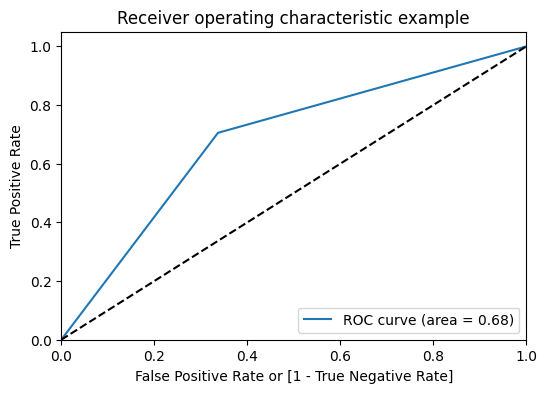

(array([0.        , 0.33702567, 1.        ]),
 array([0.        , 0.70536594, 1.        ]),
 array([2, 1, 0]))

In [ ]:
draw_roc(y_pred_final1.Default, y_pred_final1.predicted)

### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [ ]:
# Let's create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final1[i]= y_pred_final1.Default_Prob.map( lambda x: 1 if x > i else 0)
y_pred_final1.head()

,ID,Default,Default_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,165780,1.0,0.442186,0,1,1,1,1,1,0,0,0,0,0
1,58008,0.0,0.138826,0,1,1,0,0,0,0,0,0,0,0
2,143852,1.0,0.567692,1,1,1,1,1,1,1,0,0,0,0
3,62803,0.0,0.517285,1,1,1,1,1,1,1,0,0,0,0
4,135417,1.0,0.333591,0,1,1,1,1,0,0,0,0,0,0


In [ ]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final1.Default, y_pred_final1[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.498293  0.000000  1.000000
0.1   0.1  0.529003  0.067485  0.993684
0.2   0.2  0.580270  0.189733  0.973484
0.3   0.3  0.629684  0.338360  0.923005
0.4   0.4  0.665595  0.480893  0.851563
0.5   0.5  0.684098  0.662974  0.705366
0.6   0.6  0.672112  0.787090  0.556347
0.7   0.7  0.618458  0.913386  0.321509
0.8   0.8  0.544627  0.978068  0.108215
0.9   0.9  0.501752  1.000000  0.000090


<Axes: xlabel='prob'>

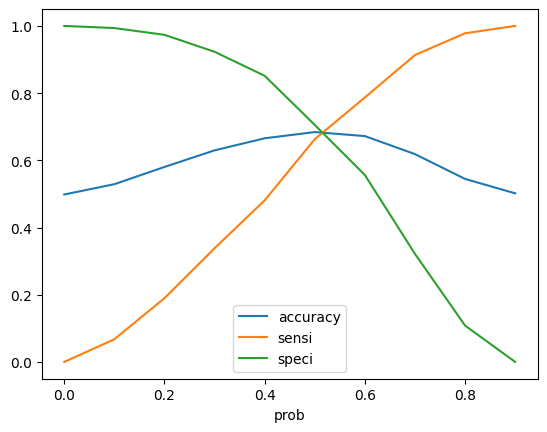

In [ ]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

### From the curve above, 0.5 is the optimum point to take it as a cutoff probability.
